In [11]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [12]:
# 1. Loading Data:

# Dataset: https://www.kaggle.com/eswarchandt/phishing-website-detector
# Contains 11,054 samples with 32 features.

data = pd.read_csv("phishing.csv")
data = data.drop(['Index'], axis=1)
print(data.head())

   UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0        1        1         1        1              1             -1   
1        1        0         1        1              1             -1   
2        1        0         1        1              1             -1   
3        1        0        -1        1              1             -1   
4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  Favicon  ...  UsingPopupWindow  \
0           0      1            -1        1  ...                 1   
1          -1     -1            -1        1  ...                 1   
2          -1     -1             1        1  ...                 1   
3           1      1            -1        1  ...                -1   
4           1      1            -1        1  ...                 1   

   IframeRedirection  AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  \
0                  1           -1            -1               0      

In [13]:
# 2. Familiarizing with Data & EDA:

print("Shape:", data.shape)

Shape: (11054, 31)


In [14]:
print("Features:", data.columns)

Features: Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')


In [15]:
print("Info:")
data.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail       

In [16]:
print("Description:")
print(data.describe().T)

Description:
                       count      mean       std  min  25%  50%  75%  max
UsingIP              11054.0  0.313914  0.949495 -1.0 -1.0  1.0  1.0  1.0
LongURL              11054.0 -0.633345  0.765973 -1.0 -1.0 -1.0 -1.0  1.0
ShortURL             11054.0  0.738737  0.674024 -1.0  1.0  1.0  1.0  1.0
Symbol@              11054.0  0.700561  0.713625 -1.0  1.0  1.0  1.0  1.0
Redirecting//        11054.0  0.741632  0.670837 -1.0  1.0  1.0  1.0  1.0
PrefixSuffix-        11054.0 -0.734938  0.678165 -1.0 -1.0 -1.0 -1.0  1.0
SubDomains           11054.0  0.064049  0.817492 -1.0 -1.0  0.0  1.0  1.0
HTTPS                11054.0  0.251040  0.911856 -1.0 -1.0  1.0  1.0  1.0
DomainRegLen         11054.0 -0.336711  0.941651 -1.0 -1.0 -1.0  1.0  1.0
Favicon              11054.0  0.628551  0.777804 -1.0  1.0  1.0  1.0  1.0
NonStdPort           11054.0  0.728243  0.685350 -1.0  1.0  1.0  1.0  1.0
HTTPSDomainURL       11054.0  0.675231  0.737640 -1.0  1.0  1.0  1.0  1.0
RequestURL           1105

In [17]:
# Checking for unique values and missing data
print("Unique values in each column:")
print(data.nunique())
print("Missing values:", data.isnull().sum().sum())

Unique values in each column:
UsingIP                2
LongURL                3
ShortURL               2
Symbol@                2
Redirecting//          2
PrefixSuffix-          2
SubDomains             3
HTTPS                  3
DomainRegLen           2
Favicon                2
NonStdPort             2
HTTPSDomainURL         2
RequestURL             2
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
InfoEmail              2
AbnormalURL            2
WebsiteForwarding      2
StatusBarCust          2
DisableRightClick      2
UsingPopupWindow       2
IframeRedirection      2
AgeofDomain            2
DNSRecording           2
WebsiteTraffic         3
PageRank               2
GoogleIndex            2
LinksPointingToPage    3
StatsReport            2
class                  2
dtype: int64
Missing values: 0


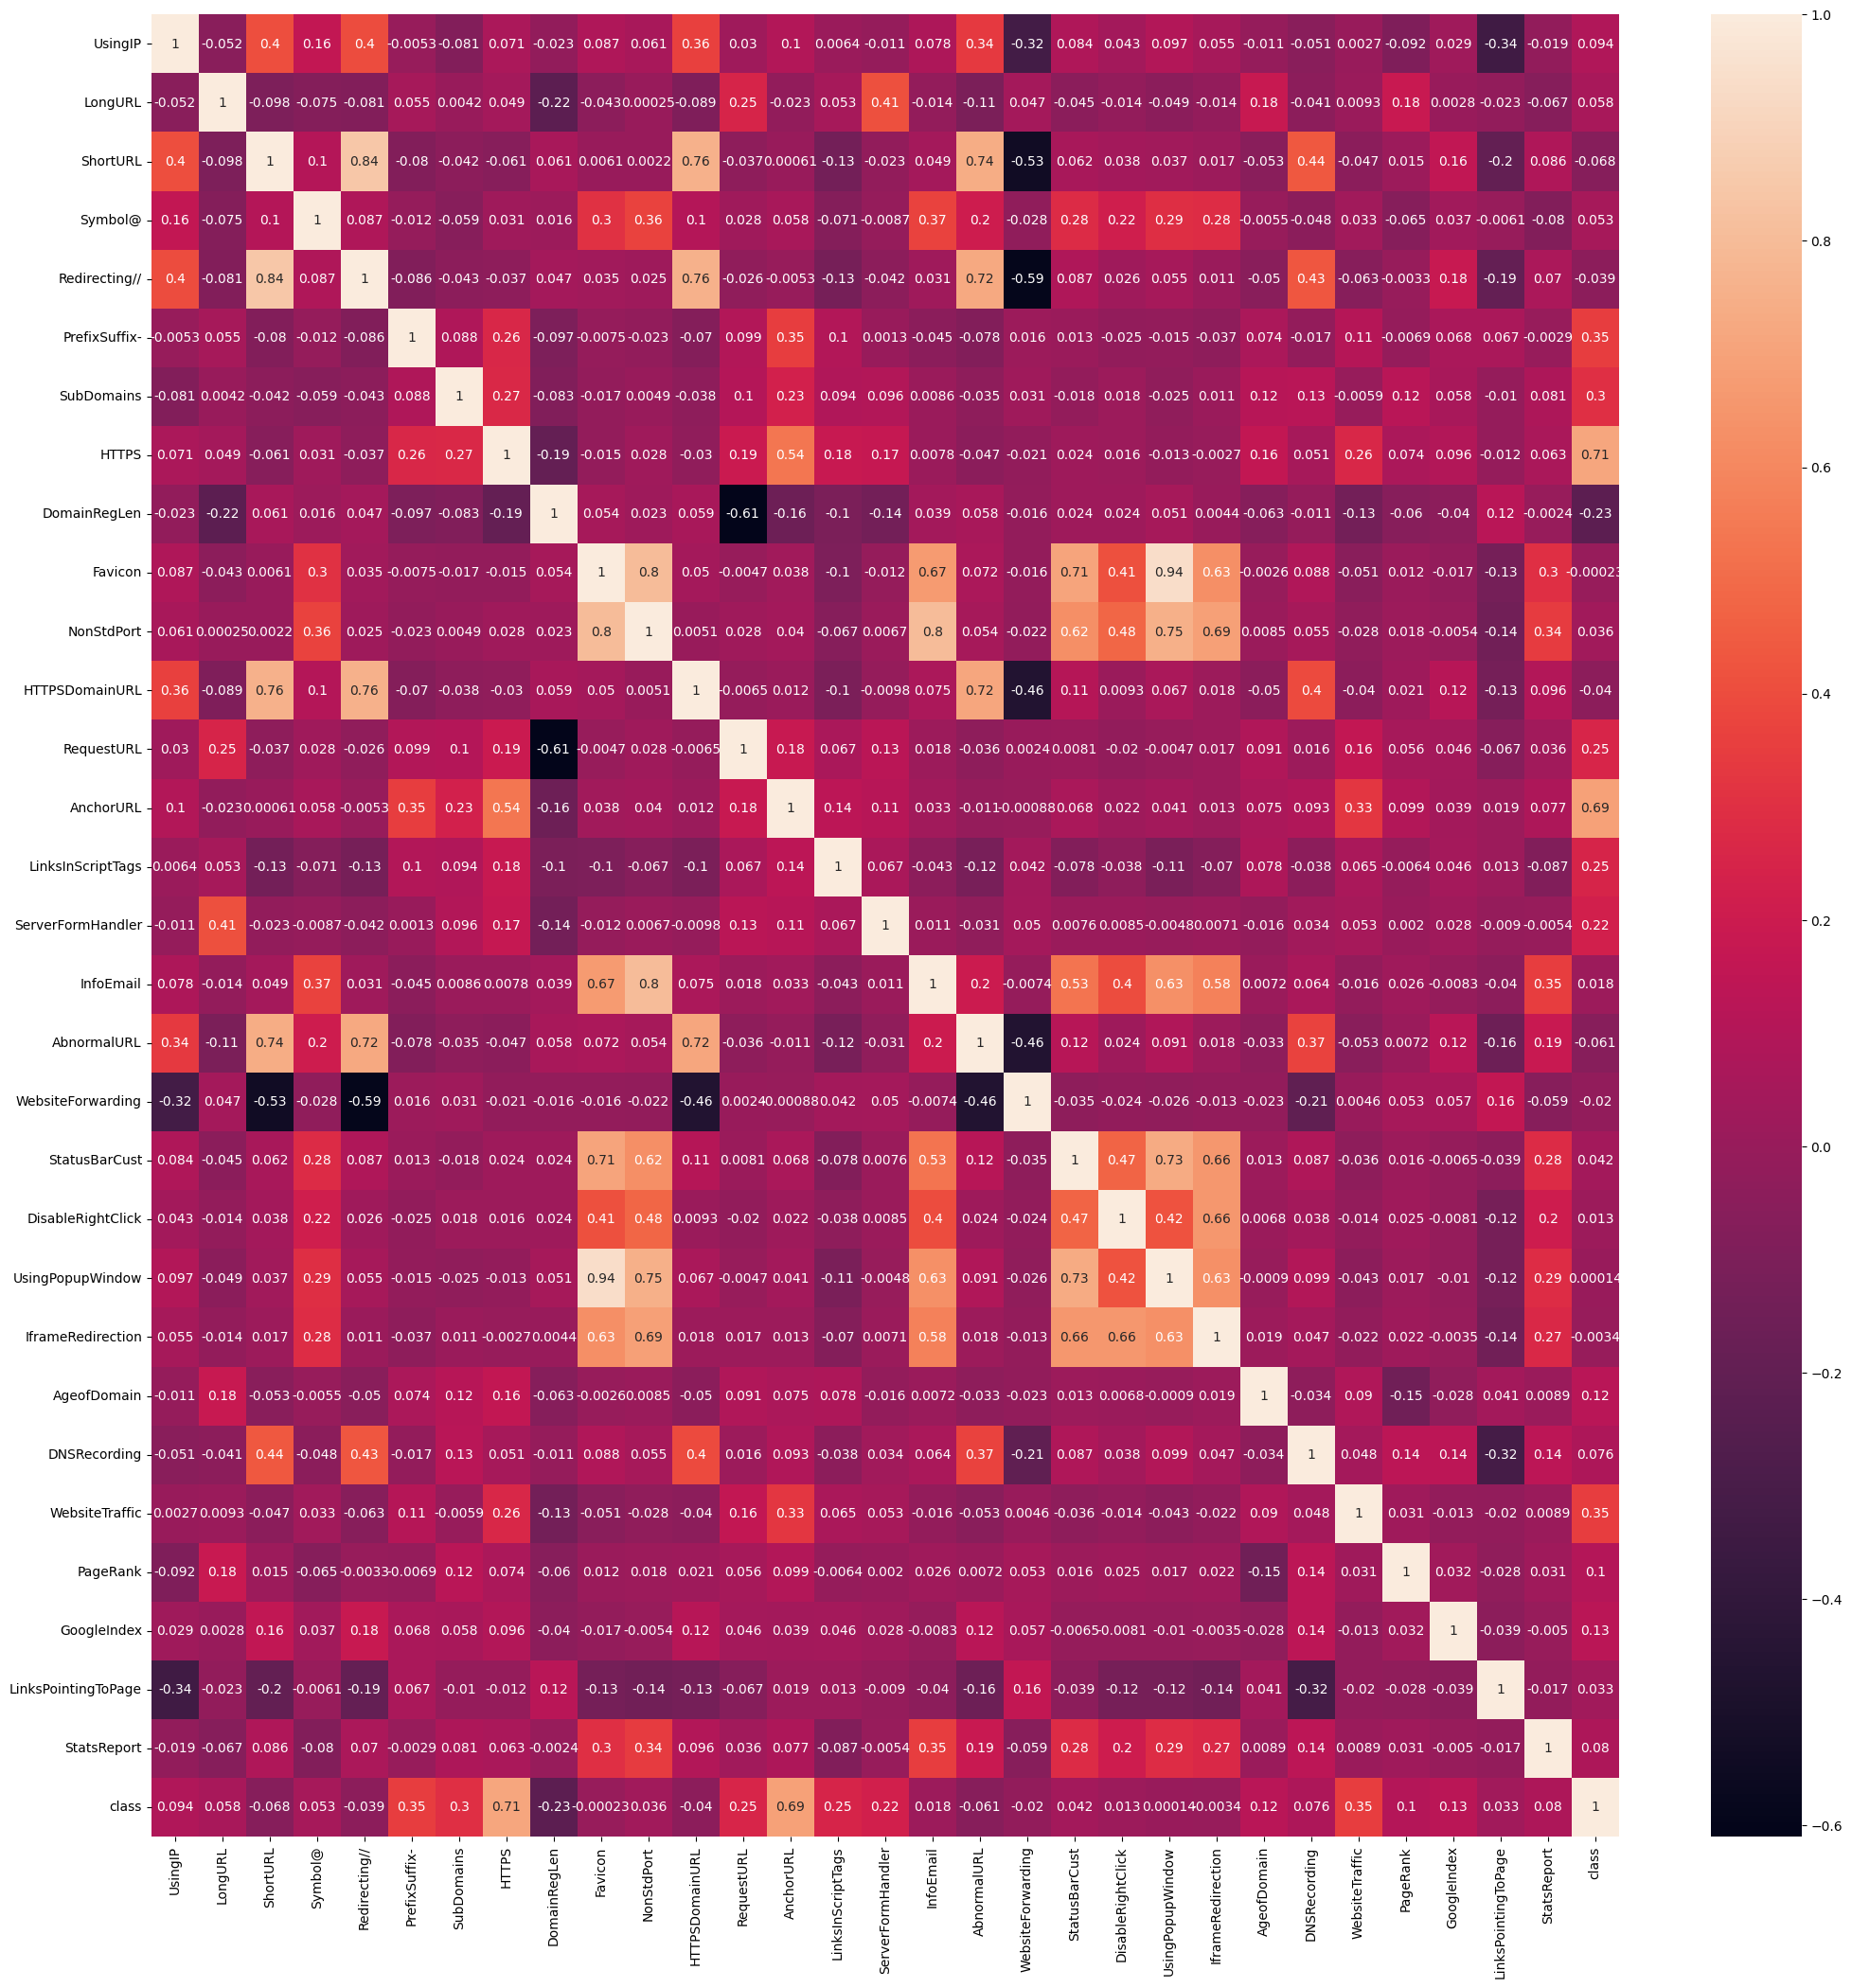

In [18]:
# 3. Visualizing the data:
# 3.1 Correlation heatmap

plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True)
plt.show()

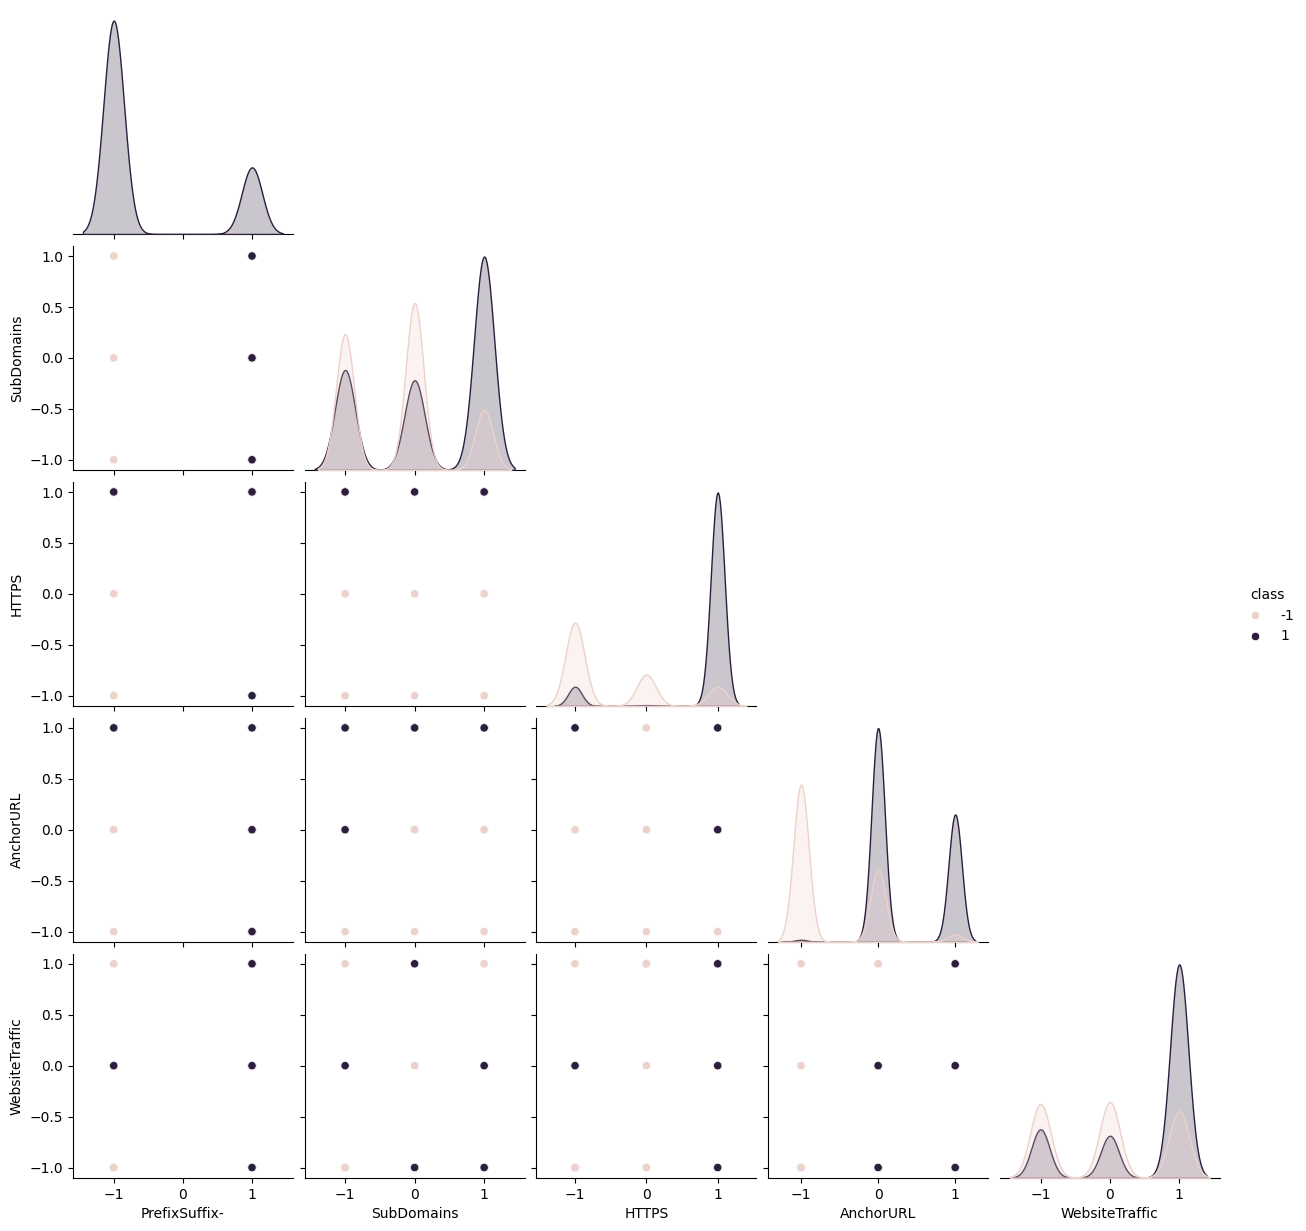

In [19]:
#3.2 Pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);

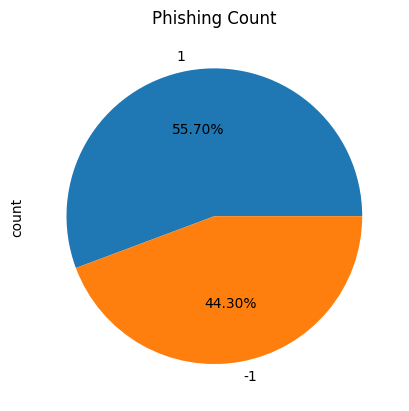

In [20]:
# 3.3 Phishing Count in pie chart
data['class'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [21]:
# 4. Splitting the Data:

X = data.drop("class", axis=1)
y = data["class"]

In [22]:
# Convert -1 labels to 0 for compatibility with XGBoost
y = y.replace(-1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test Split:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Train/Test Split:
X_train: (8843, 30) y_train: (8843,)
X_test: (2211, 30) y_test: (2211,)


In [23]:
# 5. Model Building & Training:

# Initialize holders for storing results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

# Function to store results
def storeResults(model, acc, f1, rec, prec):
    ML_Model.append(model)
    accuracy.append(round(acc, 3))
    f1_score.append(round(f1, 3))
    recall.append(round(rec, 3))
    precision.append(round(prec, 3))

In [24]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
storeResults("Logistic Regression",
             metrics.accuracy_score(y_test, y_pred_lr),
             metrics.f1_score(y_test, y_pred_lr),
             metrics.recall_score(y_test, y_pred_lr),
             metrics.precision_score(y_test, y_pred_lr))

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
storeResults("Random Forest Classifier",
             metrics.accuracy_score(y_test, y_pred_rf),
             metrics.f1_score(y_test, y_pred_rf),
             metrics.recall_score(y_test, y_pred_rf),
             metrics.precision_score(y_test, y_pred_rf))

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
storeResults("Gradient Boosting Classifier",
             metrics.accuracy_score(y_test, y_pred_gbc),
             metrics.f1_score(y_test, y_pred_gbc),
             metrics.recall_score(y_test, y_pred_gbc),
             metrics.precision_score(y_test, y_pred_gbc))

# XGBoost Classifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
storeResults("XGBoost Classifier",
             metrics.accuracy_score(y_test, y_pred_xgb),
             metrics.f1_score(y_test, y_pred_xgb),
             metrics.recall_score(y_test, y_pred_xgb),
             metrics.precision_score(y_test, y_pred_xgb))

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
storeResults("Decision Tree Classifier",
             metrics.accuracy_score(y_test, y_pred_dt),
             metrics.f1_score(y_test, y_pred_dt),
             metrics.recall_score(y_test, y_pred_dt),
             metrics.precision_score(y_test, y_pred_dt))

In [25]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_pred_lr))
print(metrics.classification_report(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_gbc))
print(metrics.classification_report(y_test, y_pred_xgb))
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

              preci

In [26]:
# 6. Comparing Models:

results = pd.DataFrame({"Model": ML_Model,
                        "Accuracy": accuracy,
                        "F1 Score": f1_score,
                        "Recall": recall,
                        "Precision": precision})
print(results.sort_values(by="Accuracy", ascending=False))

                          Model  Accuracy  F1 Score  Recall  Precision
2  Gradient Boosting Classifier     0.974     0.977   0.989      0.966
3            XGBoost Classifier     0.971     0.974   0.983      0.965
1      Random Forest Classifier     0.968     0.972   0.977      0.967
4      Decision Tree Classifier     0.959     0.963   0.961      0.966
0           Logistic Regression     0.934     0.941   0.953      0.930


In [27]:
# 7. Conclusion:

best_model_name = results.loc[results["Accuracy"].idxmax(), "Model"]
print(f"Best performing model based on Accuracy: {best_model_name}")
print(results.loc[results["Accuracy"].idxmax()])


Best performing model based on Accuracy: Gradient Boosting Classifier
Model        Gradient Boosting Classifier
Accuracy                            0.974
F1 Score                            0.977
Recall                              0.989
Precision                           0.966
Name: 2, dtype: object


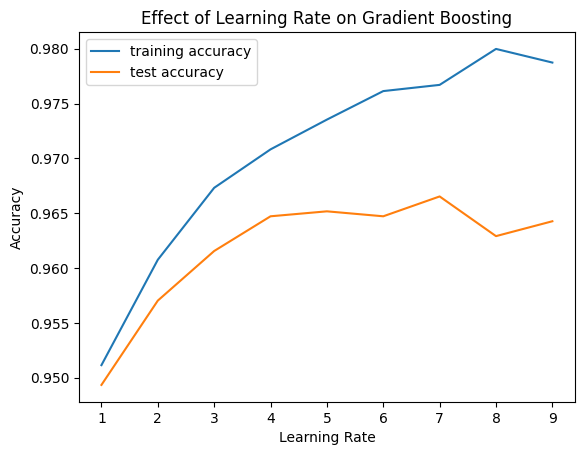

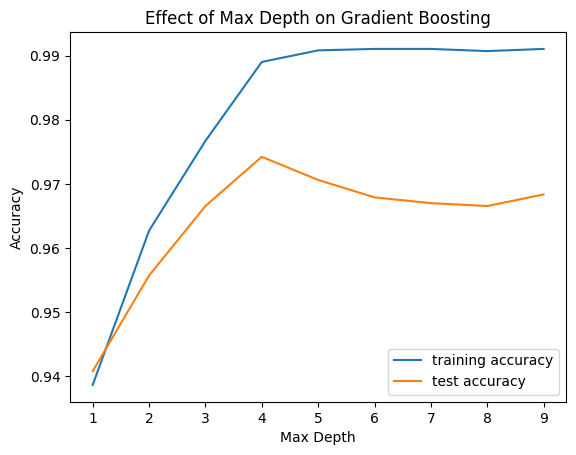

In [28]:
# 7. Plotting for the best model:

best_model_name == "Gradient Boosting Classifier"
training_accuracy = []
test_accuracy = []
# Try learning_rate from 0.1 to 0.9
depth = range(1, 10)
for n in depth:
    forest_test = GradientBoostingClassifier(learning_rate=n*0.1)
    forest_test.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    
# Plotting the training & testing accuracy for learning_rate
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.title("Effect of Learning Rate on Gradient Boosting")
plt.legend()
plt.show()

best_model_name == "Gradient Boosting Classifier"
training_accuracy = []
test_accuracy = []
# Try max_depth from 1 to 9
depth = range(1, 10, 1)
for n in depth:
    forest_test = GradientBoostingClassifier(max_depth=n, learning_rate=0.7)
    forest_test.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    
# Plotting the training & testing accuracy for max_depth
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title("Effect of Max Depth on Gradient Boosting")
plt.legend()
plt.show()

In [29]:
    # Storing the results for Gradient Boosting Classifier
acc_test_gbc = metrics.accuracy_score(y_test, y_pred_gbc)
f1_score_test_gbc = metrics.f1_score(y_test, y_pred_gbc)
recall_score_train_gbc = metrics.recall_score(y_train, gbc.predict(X_train))
precision_score_train_gbc = metrics.precision_score(y_train, gbc.predict(X_train))

storeResults('Gradient Boosting Classifier', acc_test_gbc, f1_score_test_gbc,
            recall_score_train_gbc, precision_score_train_gbc)

In [30]:
# Instantiate the model again for pickling
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)
gbc.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.7
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [31]:
# Save the trained model to a file using pickle
import pickle
pickle.dump(gbc, open('model.pkl', 'wb'))
print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


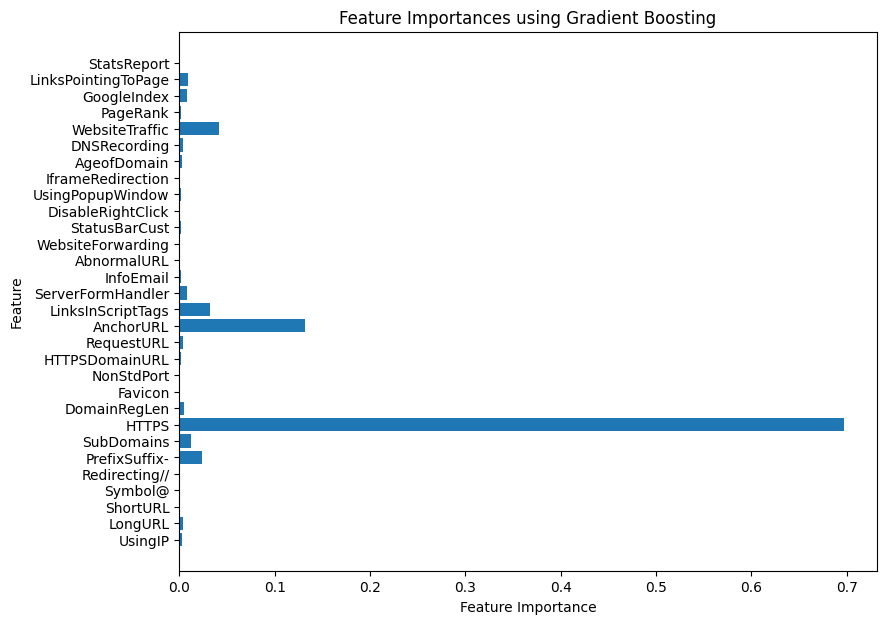

In [32]:
# Checking Feature Importance in the model
plt.figure(figsize=(9, 7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature Importances using Gradient Boosting")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()